In [5]:

import argparse

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs



Namespace(c=0.01, lr=0.1, batchsize=5, epoch=10, device=device(type='cpu'))
Epoch:    0	loss: 0.04561718654818833
Epoch:    1	loss: 0.0062266078172251585
Epoch:    2	loss: 0.00421825559809804
Epoch:    3	loss: 0.003021106328815222
Epoch:    4	loss: 0.0026625720690935852
Epoch:    5	loss: 0.0022910850029438734
Epoch:    6	loss: 0.0022310078516602516
Epoch:    7	loss: 0.0021893333829939364
Epoch:    8	loss: 0.0021803911868482828
Epoch:    9	loss: 0.002212351765483618


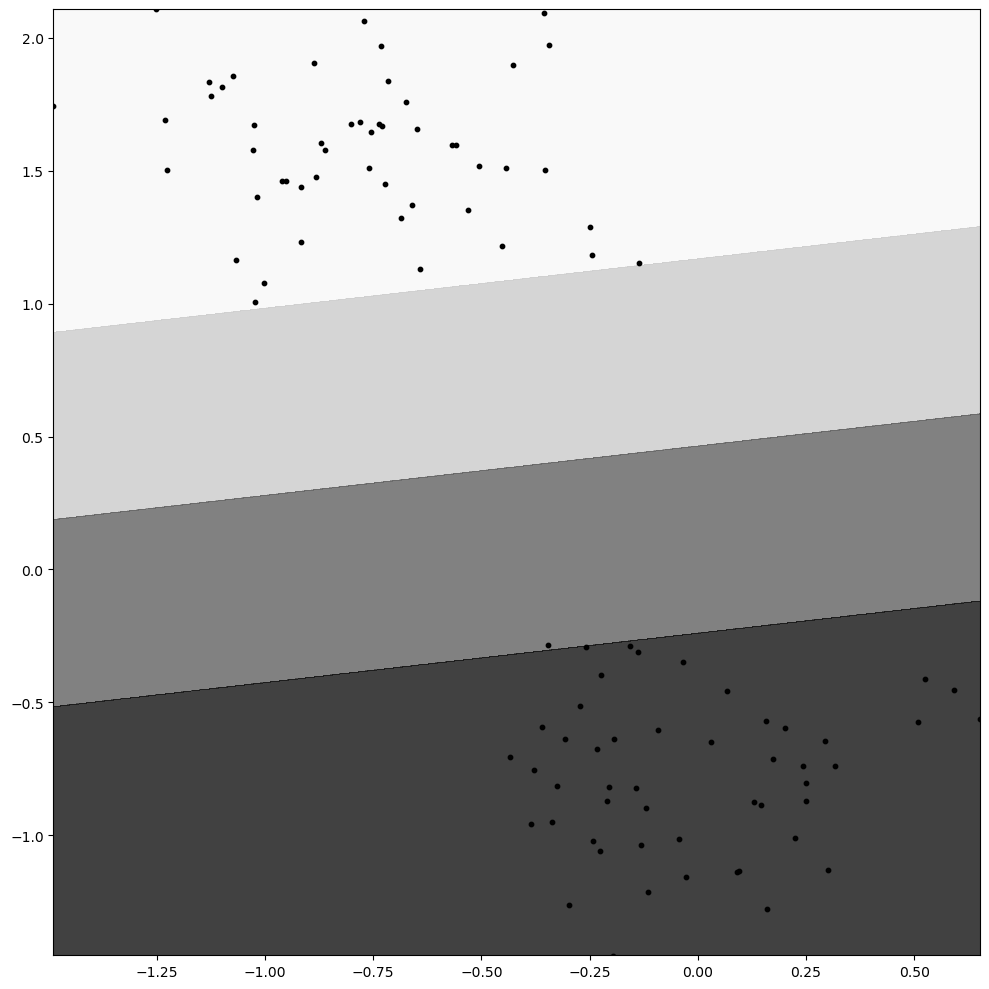

In [22]:
def train(X, Y, model, args):
    #X, Y are datasets, model is from torch.nn,
    X = torch.FloatTensor(X)
    Y = torch.FloatTensor(Y)
    # tensors are multi dimensional matrix of a single data type. this is intialized
    #as a matrix of 32 bit floats. 
    N = len(Y)

    optimizer = optim.SGD(model.parameters(), lr=args.lr)
    # SGD = stochastic gradient descent -> instead of iterating over all the data, uses 1 point or small set to 
    #make computations faster on large datasets. 
    #lr = learning rate

    model.train()
    #turns on training mode for the module
    for epoch in range(args.epoch):
        perm = torch.randperm(N)
        #returns a random permutations of numbers from 0 to N-1
        sum_loss = 0

        for i in range(0, N, args.batchsize):
            #going from 0 to N in steps of the batchsize. 
            x = X[perm[i : i + args.batchsize]].to(args.device) 
                #takes a vector from the tensor and sends it to the device
            y = Y[perm[i : i + args.batchsize]].to(args.device)

            optimizer.zero_grad() #resets the gradients
            output = model(x).squeeze()
            #since the model is a linear transformation, model(x) is a tensor again.
            #this removes all dimensions of size 1 from the tensor
            weight = model.weight.squeeze()
            #model.weight is also a tensor of learnable weights

            loss = torch.mean(torch.clamp(1 - y * output, min=0))
            #calculating the loss
            loss += args.c * (weight.t() @ weight) / 2.0

            loss.backward()
            optimizer.step()

            sum_loss += float(loss)
            #summing the loss over all i

        print("Epoch: {:4d}\tloss: {}".format(epoch, sum_loss / N))


def visualize(X, Y, model):
    W = model.weight.squeeze().detach().cpu().numpy()
    b = model.bias.squeeze().detach().cpu().numpy()

    delta = 0.001
    x = np.arange(X[:, 0].min(), X[:, 0].max(), delta)
    y = np.arange(X[:, 1].min(), X[:, 1].max(), delta)
    x, y = np.meshgrid(x, y)
    xy = list(map(np.ravel, [x, y]))

    z = (W.dot(xy) + b).reshape(x.shape)
    z[np.where(z > 1.0)] = 4
    z[np.where((z > 0.0) & (z <= 1.0))] = 3
    z[np.where((z > -1.0) & (z <= 0.0))] = 2
    z[np.where(z <= -1.0)] = 1

    plt.figure(figsize=(10, 10))
    plt.xlim([X[:, 0].min() + delta, X[:, 0].max() - delta])
    plt.ylim([X[:, 1].min() + delta, X[:, 1].max() - delta])
    plt.contourf(x, y, z, alpha=0.8, cmap="Greys")
    plt.scatter(x=X[:, 0], y=X[:, 1], c="black", s=10)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    parser = argparse.ArgumentParser() #initialize the args
    parser.add_argument("--c", type=float, default=0.01)
    parser.add_argument("--lr", type=float, default=0.1) #learning rate
    parser.add_argument("--batchsize", type=int, default=5)
    parser.add_argument("--epoch", type=int, default=10)
    parser.add_argument("--device", default="cuda", choices=["cpu", "cuda"])
    args = parser.parse_args([])
    args.device = torch.device(args.device if torch.cuda.is_available() else "cpu")

    print(args)

    X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.4) #Making sample data
    X = (X - X.mean()) / X.std()
    Y[np.where(Y == 0)] = -1

    model = nn.Linear(2, 1)
    #does an affine linear transformation over the data.
    #affine linear transformation: a linear transformation but also allows translations. 
    
    model.to(args.device)

    train(X, Y, model, args)
    visualize(X, Y, model)

In [16]:
torch.randperm(10

0
5
